In [1]:
import numpy as np 
import pandas as pd

## Loading Data

In [6]:
df = pd.read_csv("E:/GitHub/house price prediction - copy/dataset/house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


## Data Preprocessing

In [7]:
df.shape

(187531, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

## Duplicate Values

In [9]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
187526    False
187527    False
187528    False
187529    False
187530    False
Length: 187531, dtype: bool>

In [10]:
df.drop_duplicates(inplace=True)

## Handling The Missing Values

In [11]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [12]:
# Drop columns with a high number of missing values
df.drop(columns=['Society', 'Car Parking', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)

In [13]:
df.isnull().sum()

Index                    0
Title                    0
Description           3023
Amount(in rupees)        0
Price (in rupees)    17665
location                 0
Carpet Area          80673
Status                 615
Floor                 7077
Transaction             83
Furnishing            2897
facing               70233
overlooking          81436
Bathroom               828
Balcony              48935
Ownership            65517
dtype: int64

In [14]:
df.info

<bound method DataFrame.info of          Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...   

## Data Cleaning

In [15]:
df.drop(columns=['Index'],inplace=True)

In [16]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Title
2 BHK Ready to Occupy Flat for sale in Divyasree Elan Sarjapur Road                   2106
4 BHK Ready to Occupy Flat for sale in Hamdam Apartment Dwarka Sector 18              1647
2 BHK Ready to Occupy Flat for sale Nayabad                                           1295
3 BHK Ready to Occupy Flat for sale in Shree Vardhman Victoria Sector 70              1147
3 BHK Ready to Occupy Flat for sale Jagatpur                                           986
                                                                                      ... 
3 BHK Ready to Occupy Flat for sale in Planner N Maker Homes Uttam Nagar West            1
3 BHK Ready to Occupy Flat for sale Rohini Sector 8                                      1
3 BHK Ready to Occupy Flat for sale in IFS Apartments Acharya Niketan, Mayur Vihar       1
2 BHK Ready to Occupy Flat for sale in Joshi Lane Karol Bagh                             1
2 BHK Ready to Occupy Flat for sale in Friends Enclave Kishanpura                   

In [17]:
house_df = df.copy()

In [18]:
# 1. Fill null values in 'Description', 'Facing', 'Overlooking', and 'Ownership' with 'Unknown'
cols_to_fill_unknown = ['Description', 'facing', 'overlooking', 'Ownership']
house_df[cols_to_fill_unknown] = house_df[cols_to_fill_unknown].fillna('Unknown')

# 2. Fill null values in 'Price (in rupees)' with mean value
mean_price = house_df['Price (in rupees)'].mean()
house_df['Price (in rupees)'].fillna(mean_price, inplace=True)

# 3. Replace null values in 'Status', 'Transaction', and 'Furnishing' columns with mode
cols_to_fill_mode = ['Status', 'Transaction', 'Furnishing']
for col in cols_to_fill_mode:
    mode_val = house_df[col].mode().iloc[0]
    house_df[col].fillna(mode_val, inplace=True)

# 4. Convert 'Bathroom' and 'Balcony' columns to numeric form, including '>10'
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], errors='coerce')
house_df['Balcony'] = pd.to_numeric(house_df['Balcony'], errors='coerce')

# Fill NaN values in 'Bathroom' and 'Balcony' with the mean of their respective columns
mean_bathroom = house_df['Bathroom'].mean()
mean_balcony = house_df['Balcony'].mean()
house_df['Bathroom'].fillna(mean_bathroom, inplace=True)
house_df['Balcony'].fillna(mean_balcony, inplace=True)

# Convert >10 values in 'Bathroom' and 'Balcony' to their respective numeric forms
house_df.loc[house_df['Bathroom'] == '>10', 'Bathroom'] = 11
house_df['Bathroom'] = house_df['Bathroom'].astype(int)

house_df.loc[house_df['Balcony'] == '>10', 'Balcony'] = 11
house_df['Balcony'] = house_df['Balcony'].astype(int)

# Verify if all null values have been handled
print(house_df.isnull().sum())

Title                    0
Description              0
Amount(in rupees)        0
Price (in rupees)        0
location                 0
Carpet Area          80673
Status                   0
Floor                 7077
Transaction              0
Furnishing               0
facing                   0
overlooking              0
Bathroom                 0
Balcony                  0
Ownership                0
dtype: int64


In [19]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [20]:
df[['Carpet Area','Floor']]

,Carpet Area,Floor
0,500 sqft,10 out of 11
1,473 sqft,3 out of 22
2,779 sqft,10 out of 29
3,530 sqft,1 out of 3
4,635 sqft,20 out of 42
...,...,...
187526,NaN,2 out of 4
187527,NaN,4 out of 6
187528,1250 sqft,1 out of 3
187529,NaN,2 out of 2


In [21]:
# Impute missing values in 'Carpet Area' with mean
def convert_to_sqft(area):
    try:
        if pd.notnull(area):
            if 'sqft' in area:
                area = float(area.replace(' sqft', ''))
            else:
                area = float(area.replace(' sqm', '')) * 10.7639  # Convert square meters to square feet
            return area
    except ValueError:
        return np.nan

house_df['Carpet Area'] = house_df['Carpet Area'].apply(convert_to_sqft)

# Impute missing values in 'Carpet Area' with mean
mean_carpet_area = house_df['Carpet Area'].mean()
house_df['Carpet Area'].fillna(mean_carpet_area, inplace=True)

# Convert 'Carpet Area' back to a string with the 'sqft' suffix
house_df['Carpet Area'] = house_df['Carpet Area'].astype(int).astype(str) + ' sqft'

# Impute missing values in 'Floor' with mode (most frequent value)
mode_floor = house_df['Floor'].mode().iloc[0]
house_df['Floor'].fillna(mode_floor, inplace=True)

# Verify if all null values have been handled
print(house_df.isnull().sum())

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64


In [22]:
house_df

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.000000,zirakpur,1267 sqft,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,3,3,Freehold
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.000000,zirakpur,1267 sqft,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3,2,Unknown
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.000000,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",3,2,Freehold
187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.000000,zirakpur,1267 sqft,Ready to Move,2 out of 2,Resale,Semi-Furnished,Unknown,Main Road,2,2,Unknown


In [23]:
house_df.duplicated().sum()

119348

In [24]:
house_df.drop_duplicates(inplace=True)

In [25]:
house_df.shape

(68183, 15)

In [26]:
df = house_df.copy()

In [27]:
df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [28]:
df[['Amount(in rupees)','Carpet Area']]

,Amount(in rupees),Carpet Area
0,42 Lac,500 sqft
1,98 Lac,473 sqft
2,1.40 Cr,779 sqft
3,25 Lac,530 sqft
4,1.60 Cr,635 sqft
...,...,...
187526,63 Lac,1267 sqft
187527,55 Lac,1267 sqft
187528,76 Lac,1250 sqft
187529,30 Lac,1267 sqft


In [29]:
# Convert 'Amount(in rupees)' to numerical format
def convert_amount(amount):
    try:
        if 'Lac' in amount:
            amount = amount.replace('Lac', '').strip()
            return float(amount) * 100000  # Convert Lac to rupees (1 Lac = 100000 rupees)
        elif 'Cr' in amount:
            amount = amount.replace('Cr', '').strip()
            return float(amount) * 10000000  # Convert Cr to rupees (1 Cr = 10000000 rupees)
        else:
            return float(amount)
    except ValueError:
        return None

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)

# Convert 'Carpet Area' to numerical format
def convert_carpet_area(area):
    try:
        if 'sqft' in area:
            area = area.replace('sqft', '').strip()
            return float(area)  # Convert to square feet
        elif 'sqm' in area:
            area = area.replace('sqm', '').strip()
            return float(area) * 10.7639  # Convert square meters to square feet (1 sqm = 10.7639 sqft)
        else:
            return None
    except ValueError:
        return None

df['Carpet Area'] = df['Carpet Area'].apply(convert_carpet_area)

# Rename the columns to reflect the converted units
df.rename(columns={'Amount(in rupees)': 'Amount in rupees', 'Carpet Area': 'Carpet Area in sqft'}, inplace=True)

# Verify the changes
df.head()

,Title,Description,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68183 entries, 0 to 187530
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                68183 non-null  object 
 1   Description          68183 non-null  object 
 2   Amount in rupees     65248 non-null  float64
 3   Price (in rupees)    68183 non-null  float64
 4   location             68183 non-null  object 
 5   Carpet Area in sqft  68183 non-null  float64
 6   Status               68183 non-null  object 
 7   Floor                68183 non-null  object 
 8   Transaction          68183 non-null  object 
 9   Furnishing           68183 non-null  object 
 10  facing               68183 non-null  object 
 11  overlooking          68183 non-null  object 
 12  Bathroom             68183 non-null  int32  
 13  Balcony              68183 non-null  int32  
 14  Ownership            68183 non-null  object 
dtypes: float64(3), int32(2), object(10)

In [31]:
df.describe()

,Amount in rupees,Price (in rupees),Carpet Area in sqft,Bathroom,Balcony
count,6.524800e+04,6.818300e+04,68183.000000,68183.000000,68183.000000
mean,1.067952e+07,6.873848e+03,1282.707874,2.404030,2.060352
std,6.292855e+07,4.258265e+04,3741.375174,0.877477,0.854484
min,1.000000e+05,0.000000e+00,1.000000,1.000000,1.000000
25%,4.100000e+06,3.957000e+03,1030.000000,2.000000,2.000000
50%,6.500000e+06,5.357000e+03,1267.000000,2.000000,2.000000
75%,1.090000e+07,7.583772e+03,1267.000000,3.000000,2.000000
max,1.400300e+10,6.700000e+06,709222.000000,10.000000,10.000000


In [32]:
df.head()

,Title,Description,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [33]:
df.head()

,Title,Description,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [34]:
df.duplicated().sum()

0

In [35]:
df.dtypes

Title                   object
Description             object
Amount in rupees       float64
Price (in rupees)      float64
location                object
Carpet Area in sqft    float64
Status                  object
Floor                   object
Transaction             object
Furnishing              object
facing                  object
overlooking             object
Bathroom                 int32
Balcony                  int32
Ownership               object
dtype: object

## EDA

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Word cloud

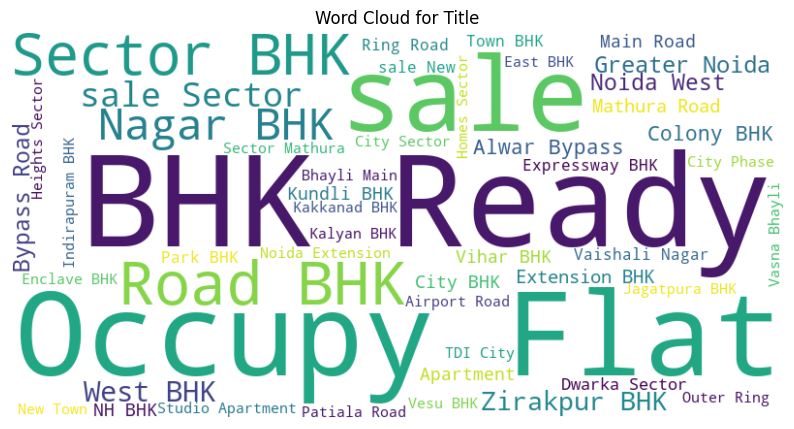

In [38]:
# Word Cloud for 'Title'
from wordcloud import WordCloud
title_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(' '.join(df['Title']))
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Title')
plt.axis('off')
plt.show()

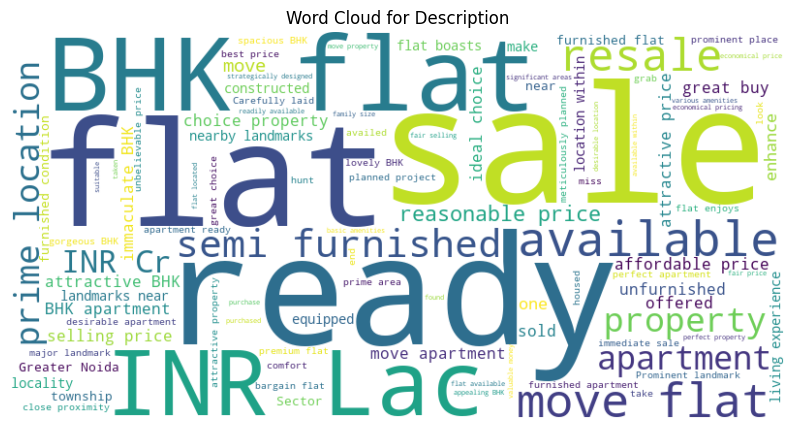

In [39]:
# Word Cloud for 'Description'
desc_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(df['Description']))
plt.figure(figsize=(10, 6))
plt.imshow(desc_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Description')
plt.axis('off')
plt.show()

## Univariate Analysis 

BoxPlot

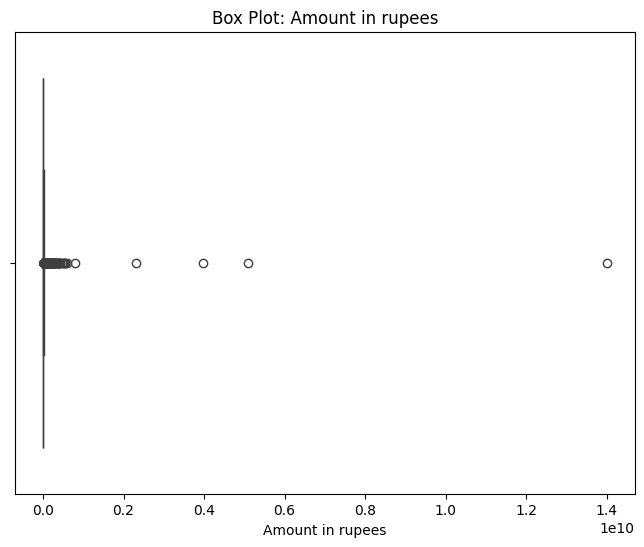

In [40]:
# Box Plot for 'Amount in rupees'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount in rupees', data=df)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

Histogram

Summary statistics for column Amount in rupees
count    6.524800e+04
mean     1.067952e+07
std      6.292855e+07
min      1.000000e+05
25%      4.100000e+06
50%      6.500000e+06
75%      1.090000e+07
max      1.400300e+10
Name: Amount in rupees, dtype: float64


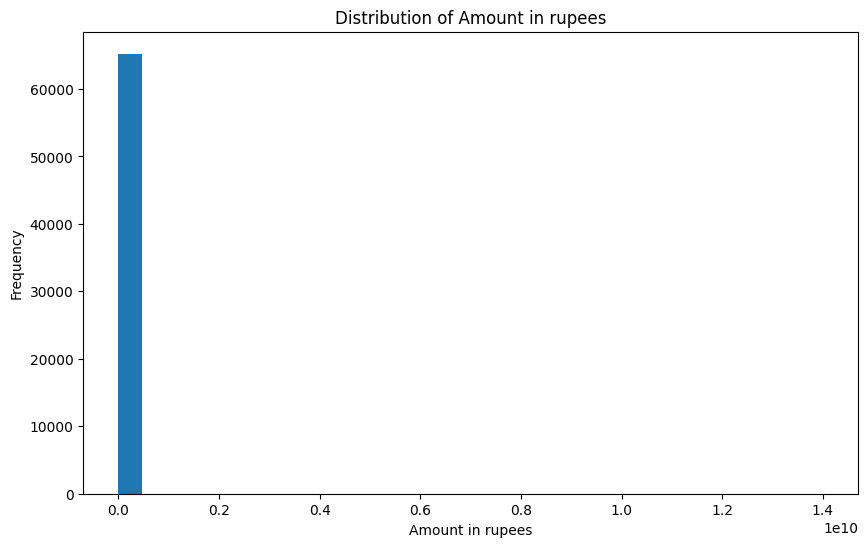

Summary statistics for column Price (in rupees)
count    6.818300e+04
mean     6.873848e+03
std      4.258265e+04
min      0.000000e+00
25%      3.957000e+03
50%      5.357000e+03
75%      7.583772e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


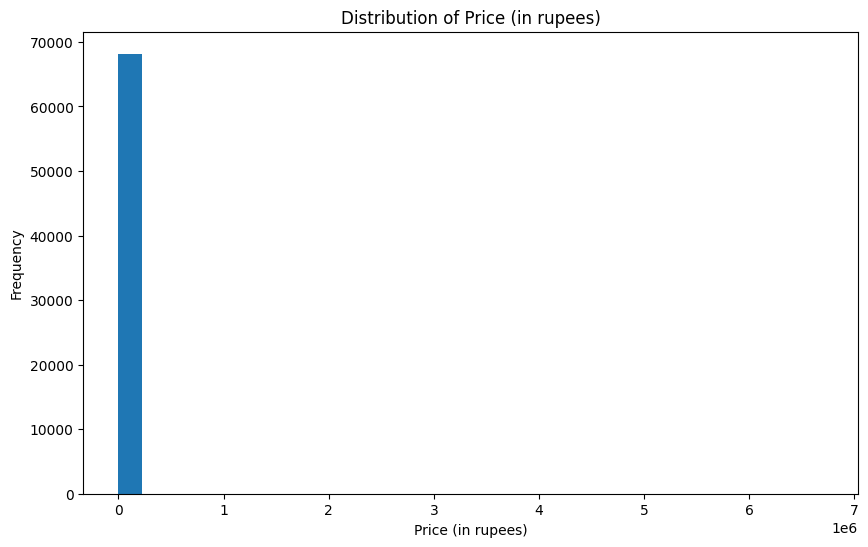

Summary statistics for column Carpet Area in sqft
count     68183.000000
mean       1282.707874
std        3741.375174
min           1.000000
25%        1030.000000
50%        1267.000000
75%        1267.000000
max      709222.000000
Name: Carpet Area in sqft, dtype: float64


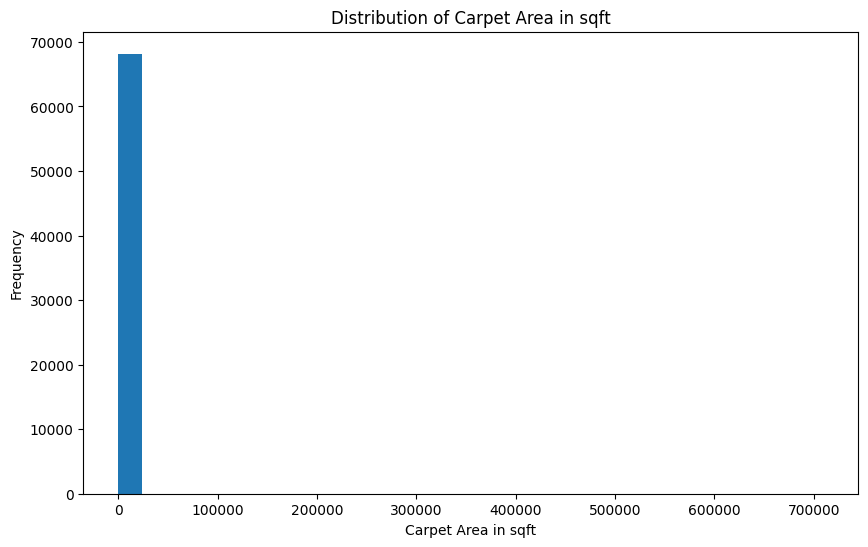

Summary statistics for column Bathroom
count    68183.000000
mean         2.404030
std          0.877477
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Bathroom, dtype: float64


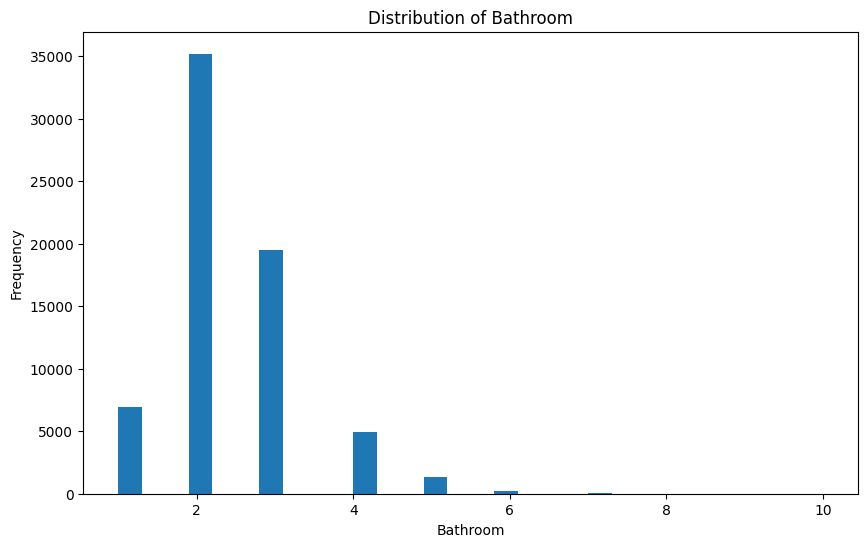

Summary statistics for column Balcony
count    68183.000000
mean         2.060352
std          0.854484
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Balcony, dtype: float64


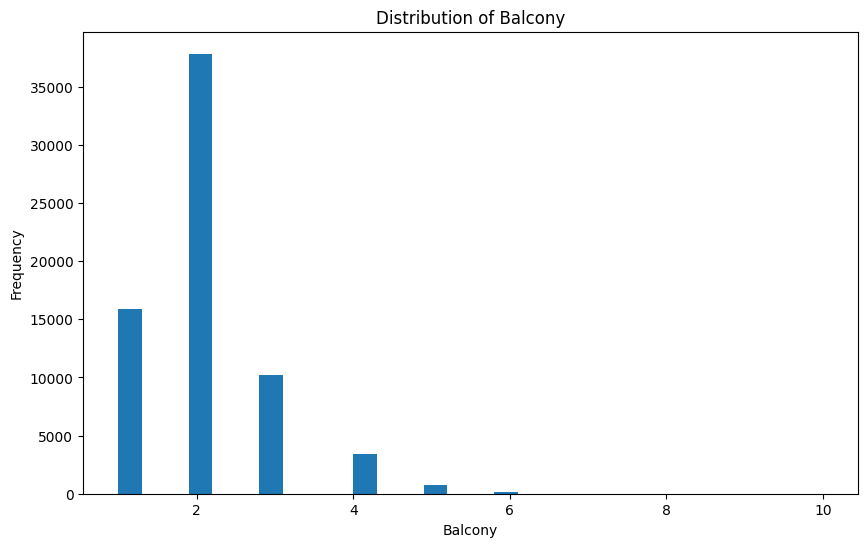

In [41]:
# Univariate analysis for numeric variables
numeric_columns = ['Amount in rupees', 'Price (in rupees)', 'Carpet Area in sqft', 'Bathroom', 'Balcony']
for column in numeric_columns:
    print("Summary statistics for column", column)
    print(df[column].describe())
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Bar Plot

Unique values in column Transaction
Resale          50692
New Property    17429
Other              60
Rent/Lease          2
Name: Transaction, dtype: int64


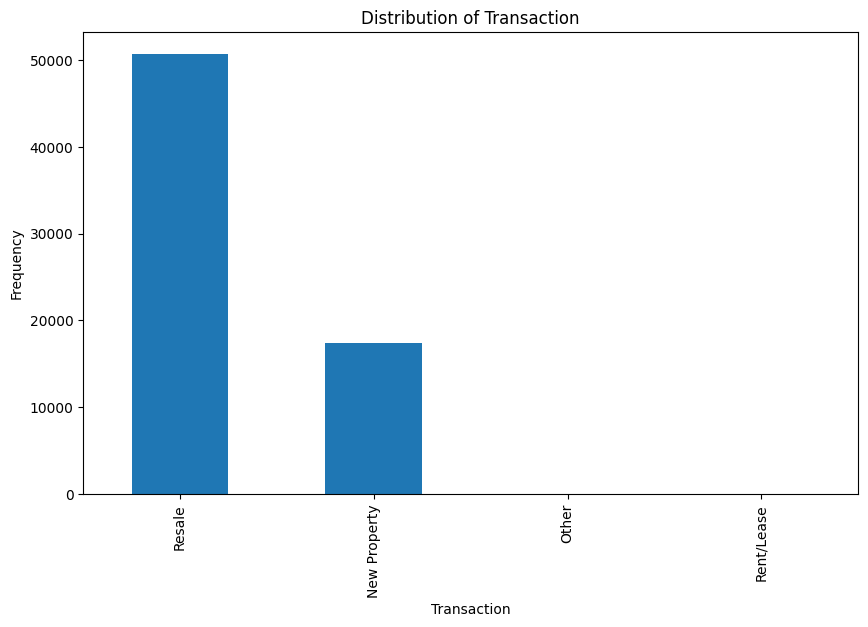

Unique values in column Furnishing
Semi-Furnished    30537
Unfurnished       28530
Furnished          9116
Name: Furnishing, dtype: int64


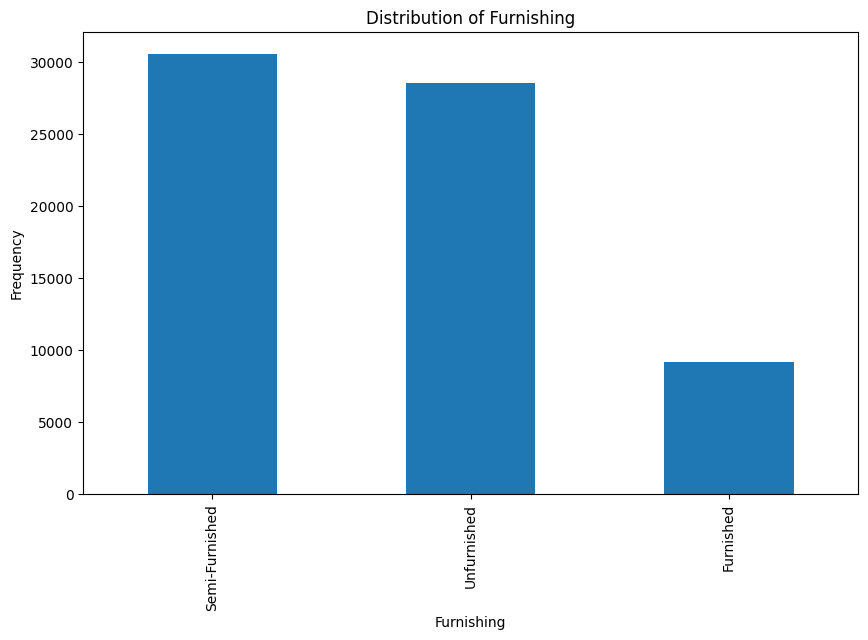

Unique values in column facing
Unknown         26791
East            19000
North - East     8644
North            5642
West             3301
South            1689
South - East     1256
North - West     1189
South -West       671
Name: facing, dtype: int64


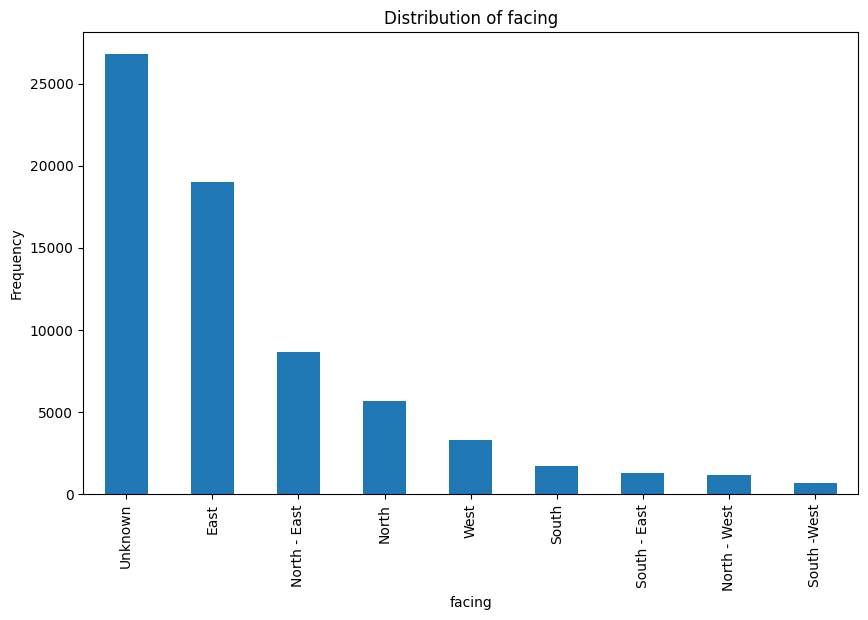

Unique values in column overlooking
Unknown                                        29526
Main Road                                      12245
Garden/Park, Main Road                          8875
Garden/Park                                     8269
Garden/Park, Pool, Main Road                    4735
Pool, Garden/Park, Main Road                    1593
Garden/Park, Pool                               1383
Pool, Garden/Park                                367
Pool                                             355
Main Road, Garden/Park                           351
Main Road, Garden/Park, Pool                     213
Pool, Main Road                                  202
Garden/Park, Main Road, Pool                      37
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        1
Garden/Par

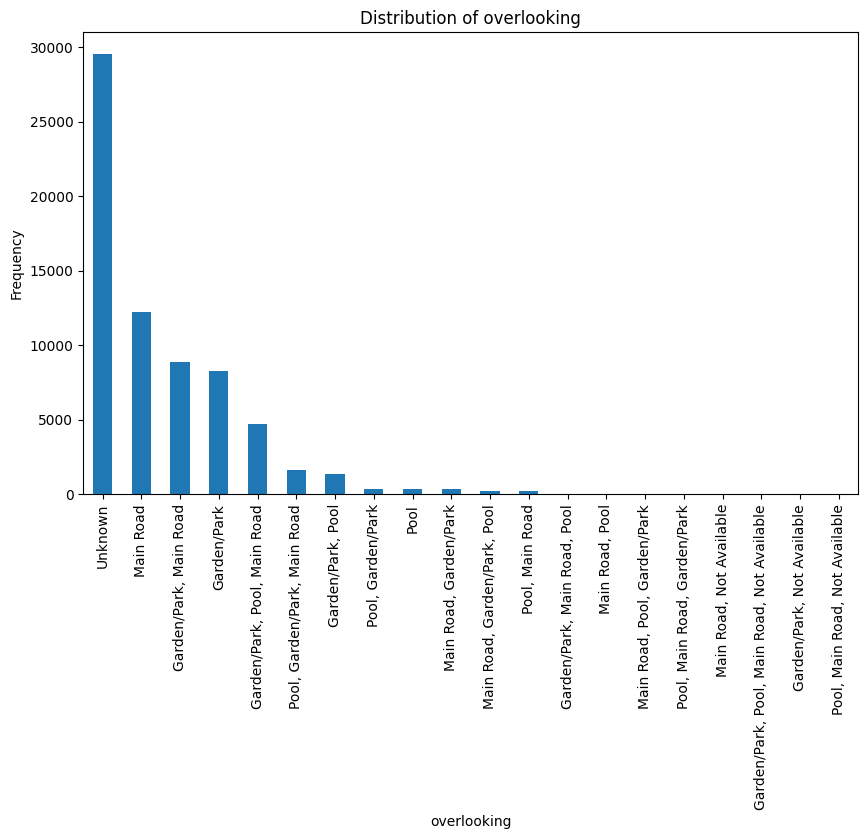

Unique values in column Ownership
Freehold                37341
Unknown                 24919
Leasehold                3070
Co-operative Society     2370
Power Of Attorney         483
Name: Ownership, dtype: int64


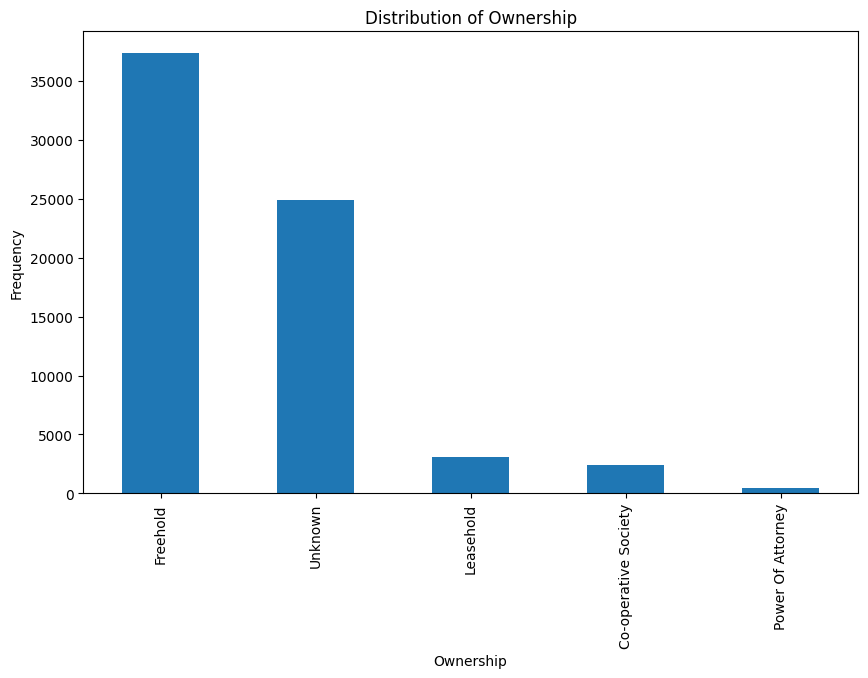

In [42]:
# Univariate analysis for categorical variables
categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']
for column in categorical_columns:
    print("Unique values in column", column)
    print(df[column].value_counts())
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Bivariate Analysis

Scatter Plot

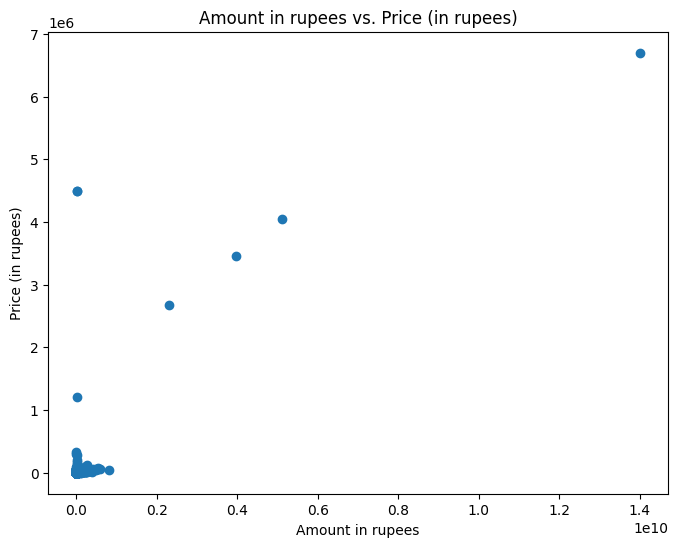

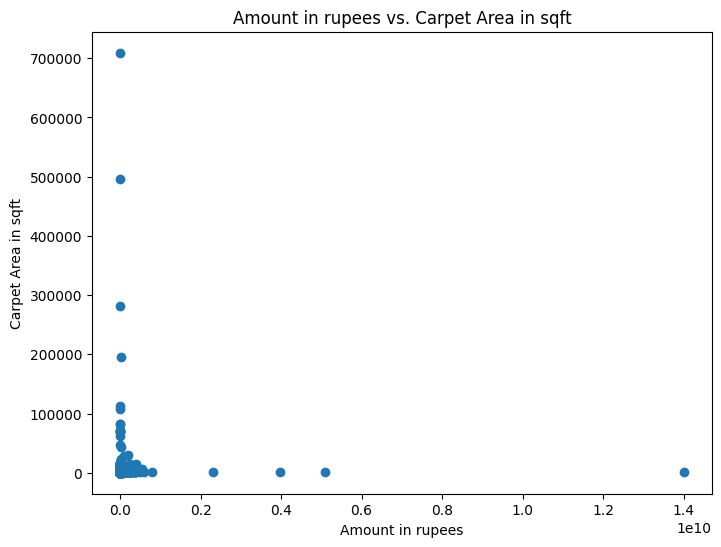

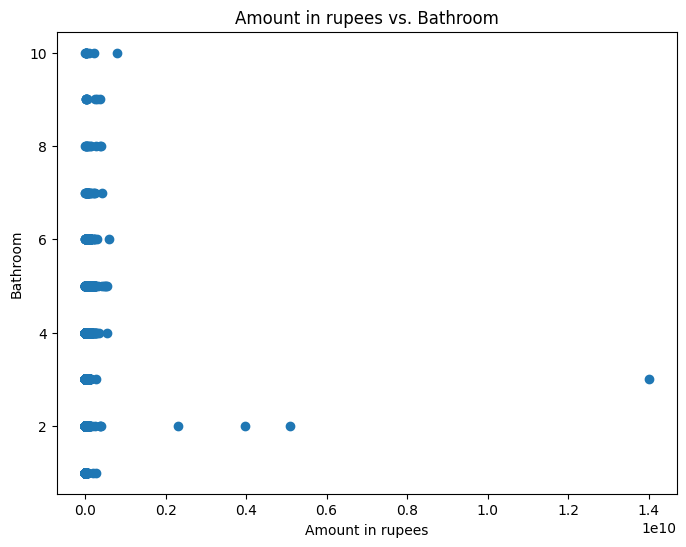

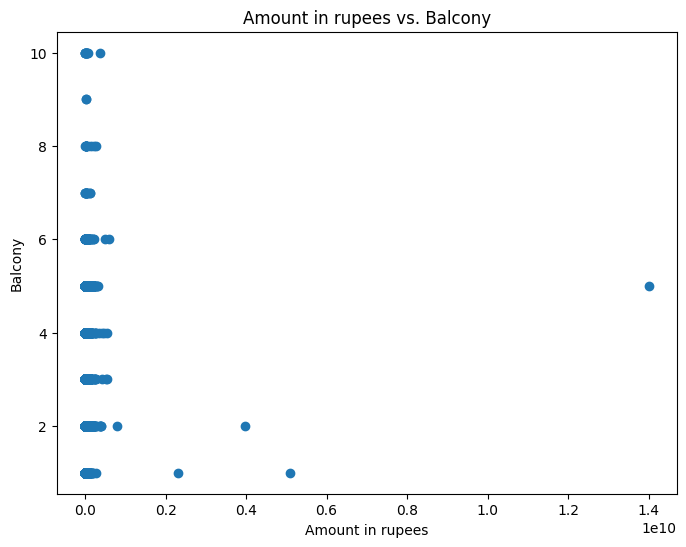

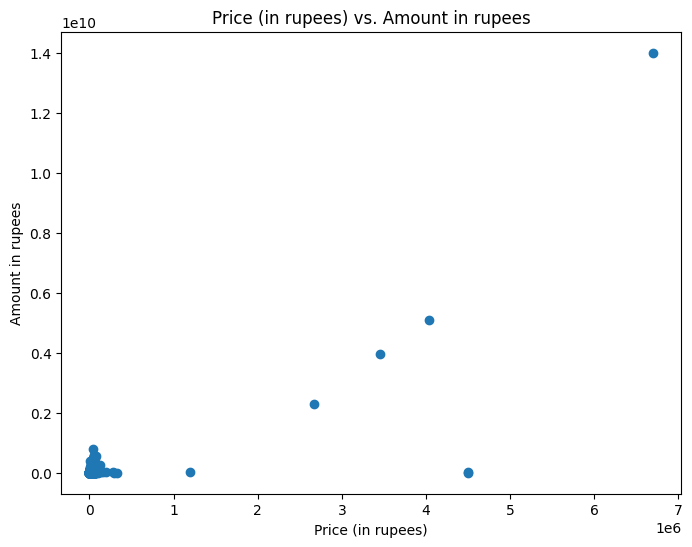

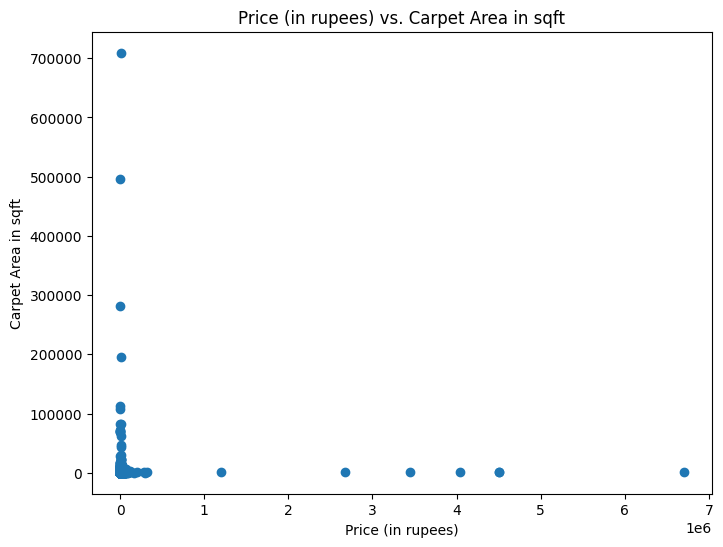

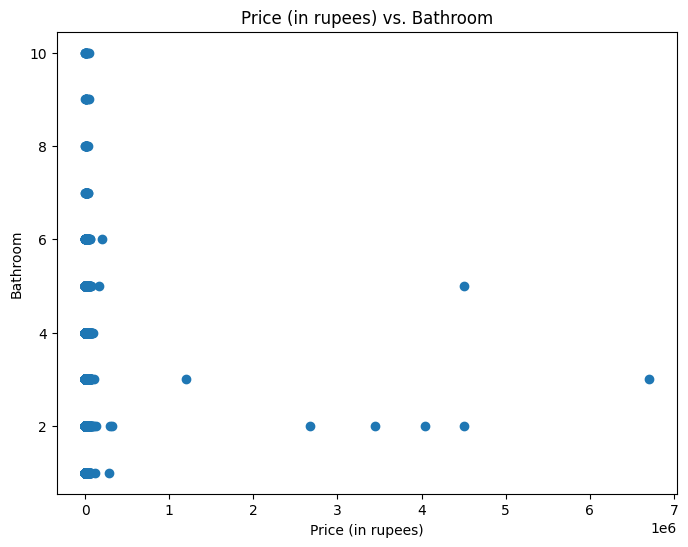

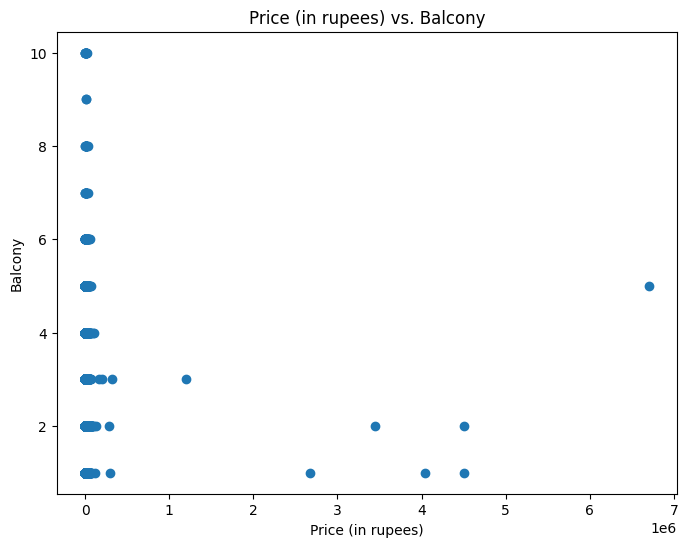

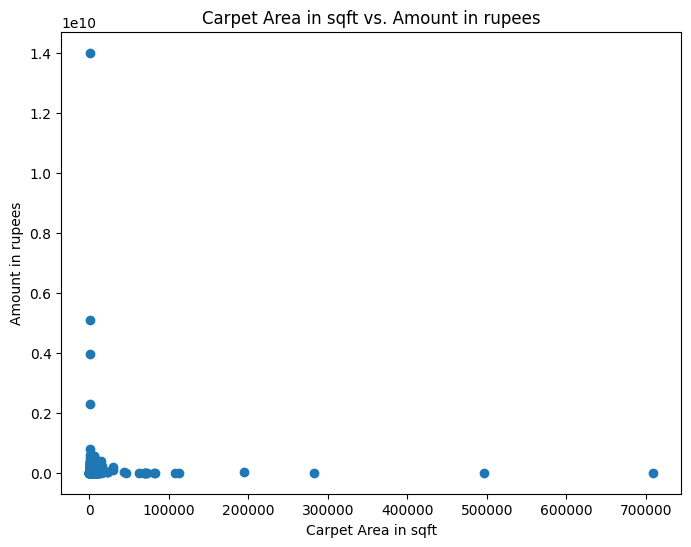

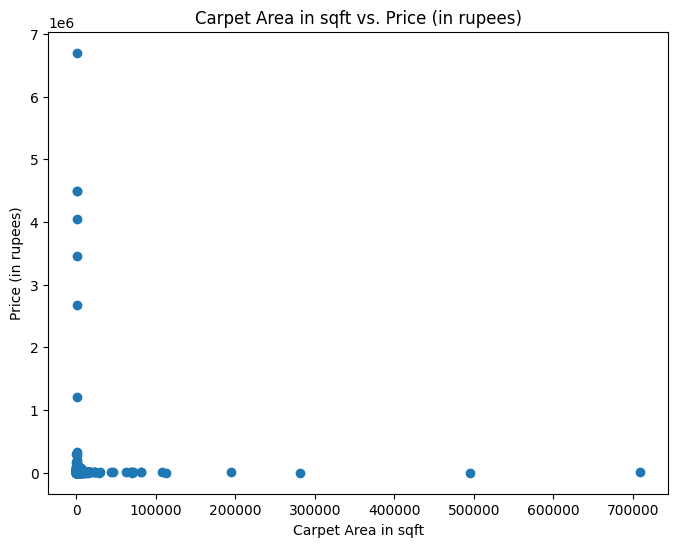

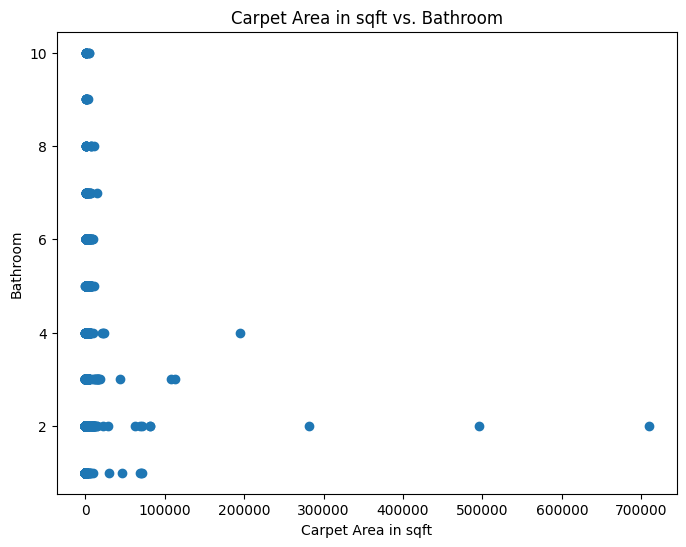

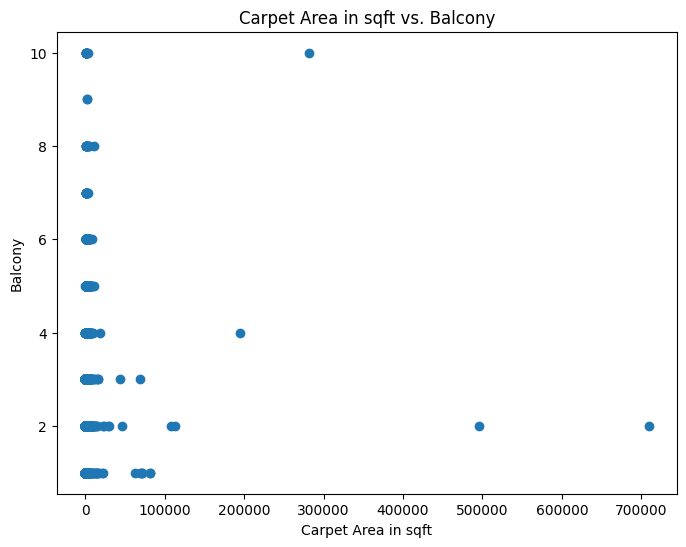

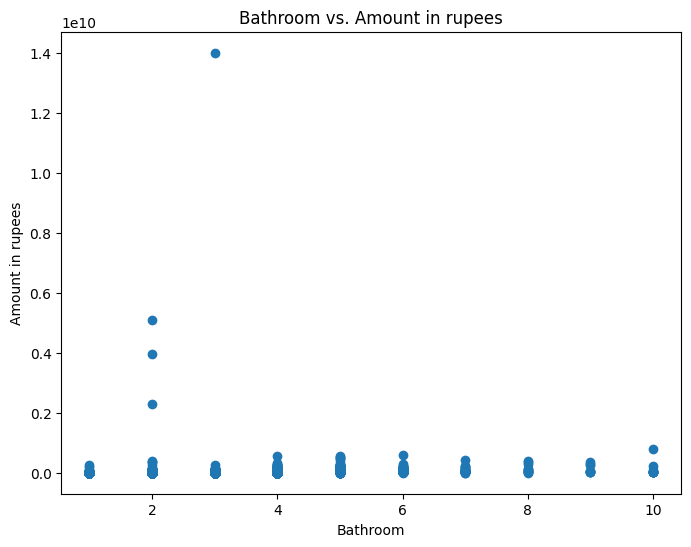

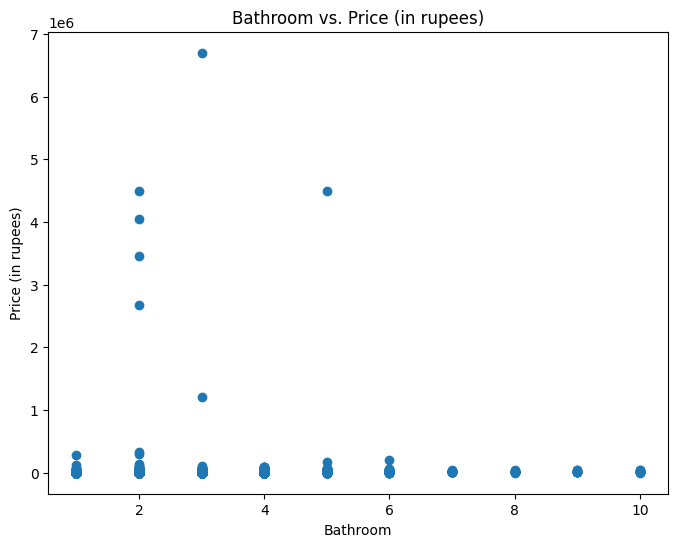

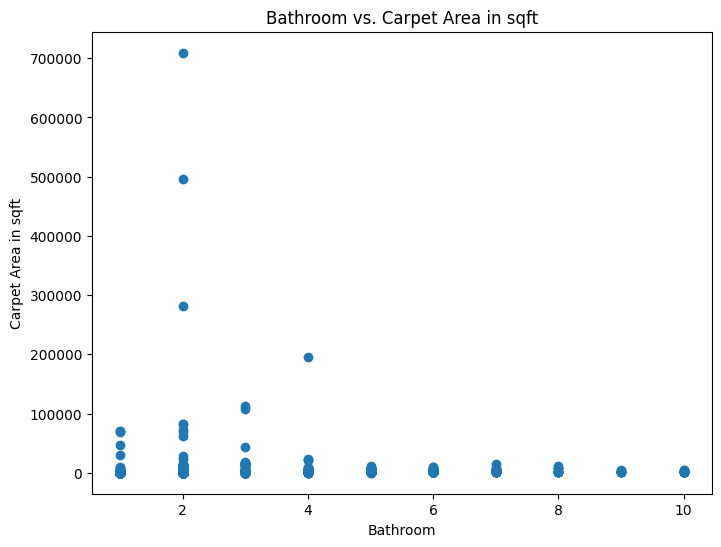

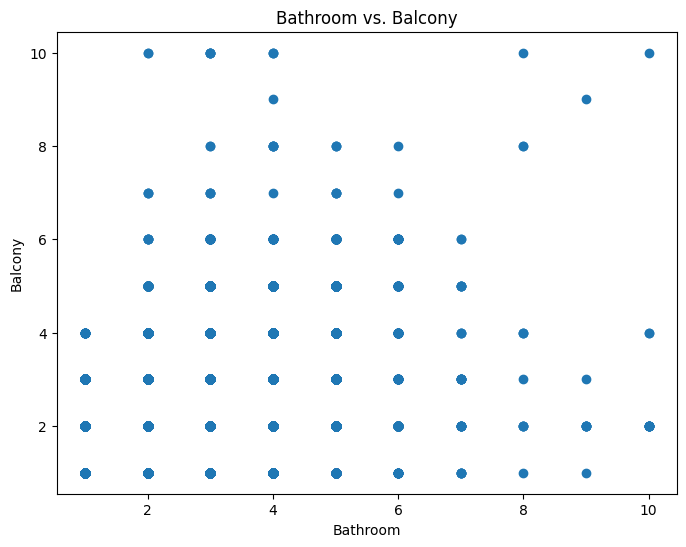

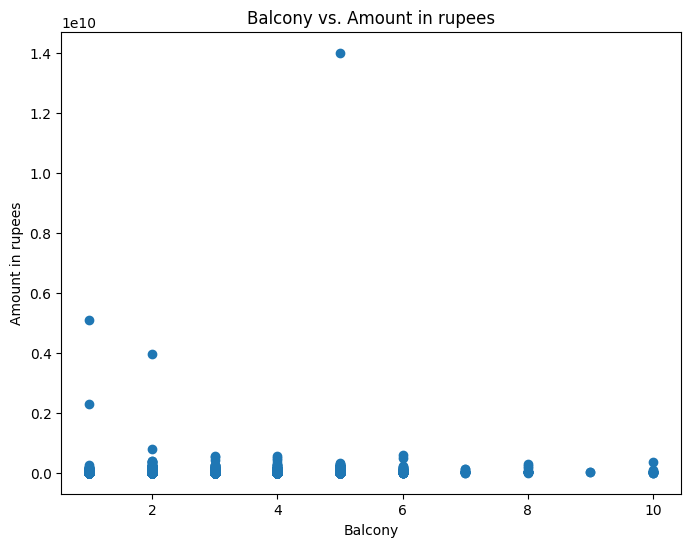

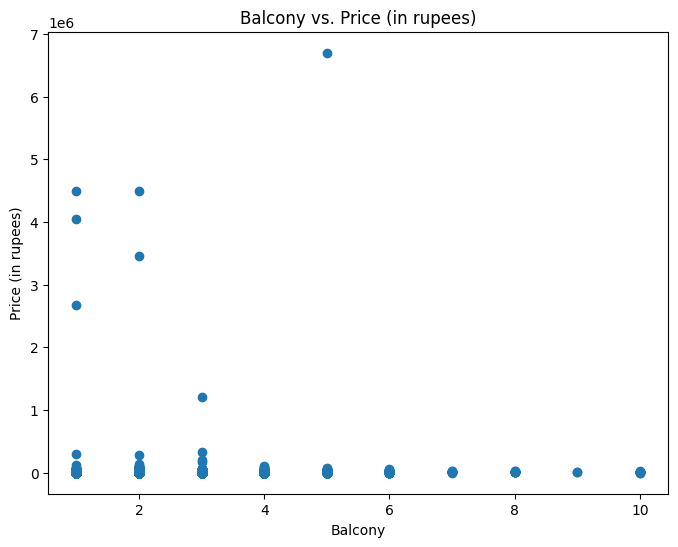

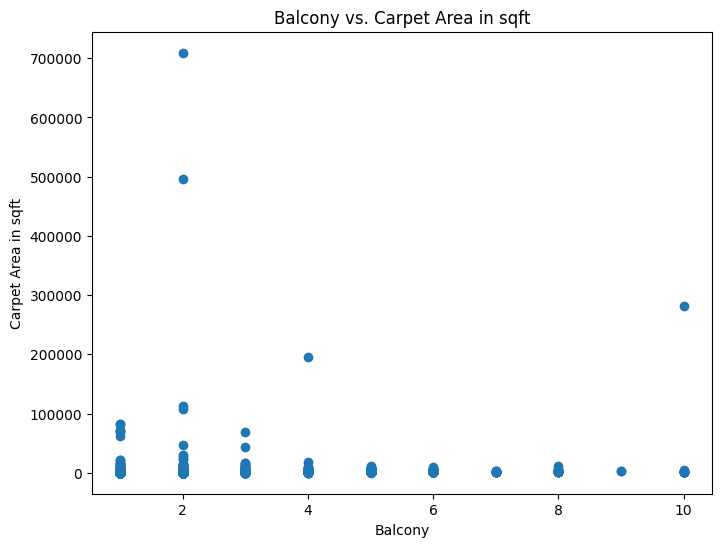

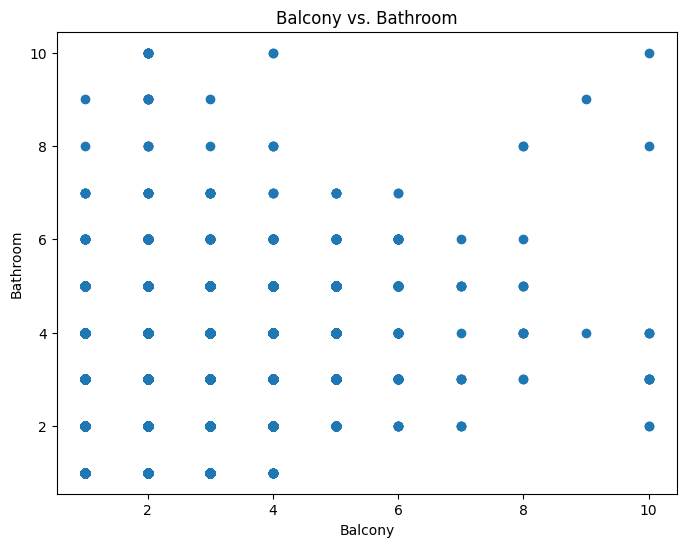

In [43]:
# Bivariate analysis for numeric vs. numeric variables
numeric_vs_numeric_columns = ['Amount in rupees', 'Price (in rupees)', 'Carpet Area in sqft', 'Bathroom', 'Balcony']
for column1 in numeric_vs_numeric_columns:
    for column2 in numeric_vs_numeric_columns:
        if column1 != column2:
            plt.figure(figsize=(8, 6))
            plt.scatter(df[column1], df[column2])
            plt.title(f"{column1} vs. {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

Pie Chart

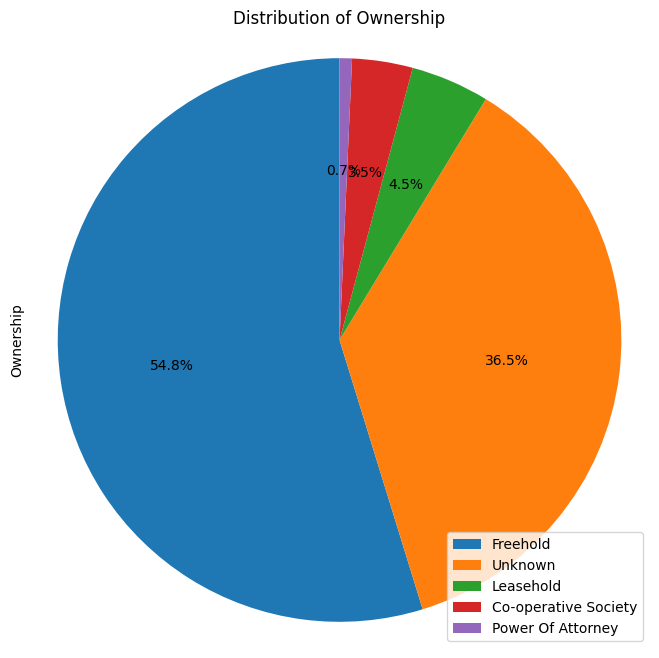

In [44]:
# Let's plot a pie chart for the 'Ownership' column
plt.figure(figsize=(8, 8))
df['Ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, startangle=90)
plt.axis('equal')
plt.legend(labels=df['Ownership'].value_counts().index, loc='best')
plt.title("Distribution of Ownership")
plt.show()

## Multivariate Analysis

Heat Map

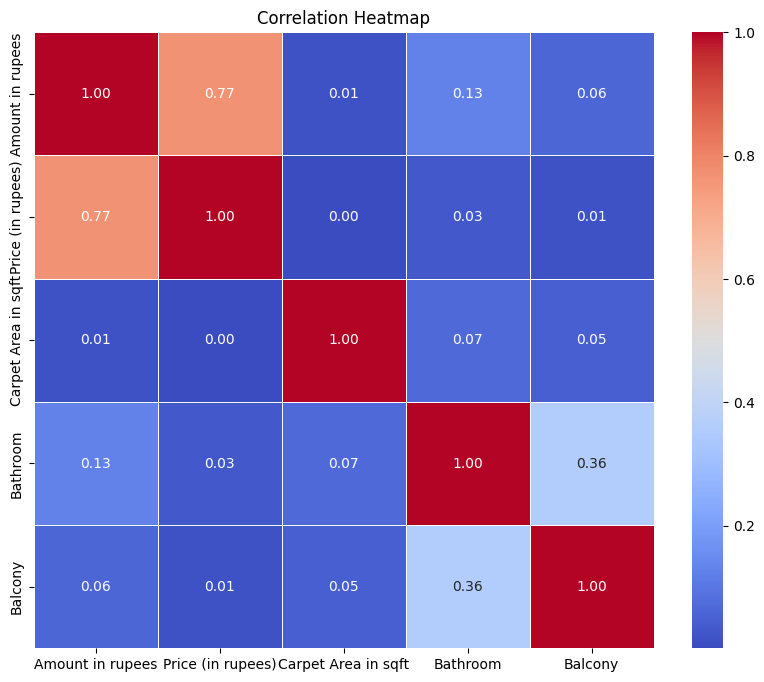

In [45]:
# Let's plot a heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Cluster Map

<Figure size 1000x800 with 0 Axes>

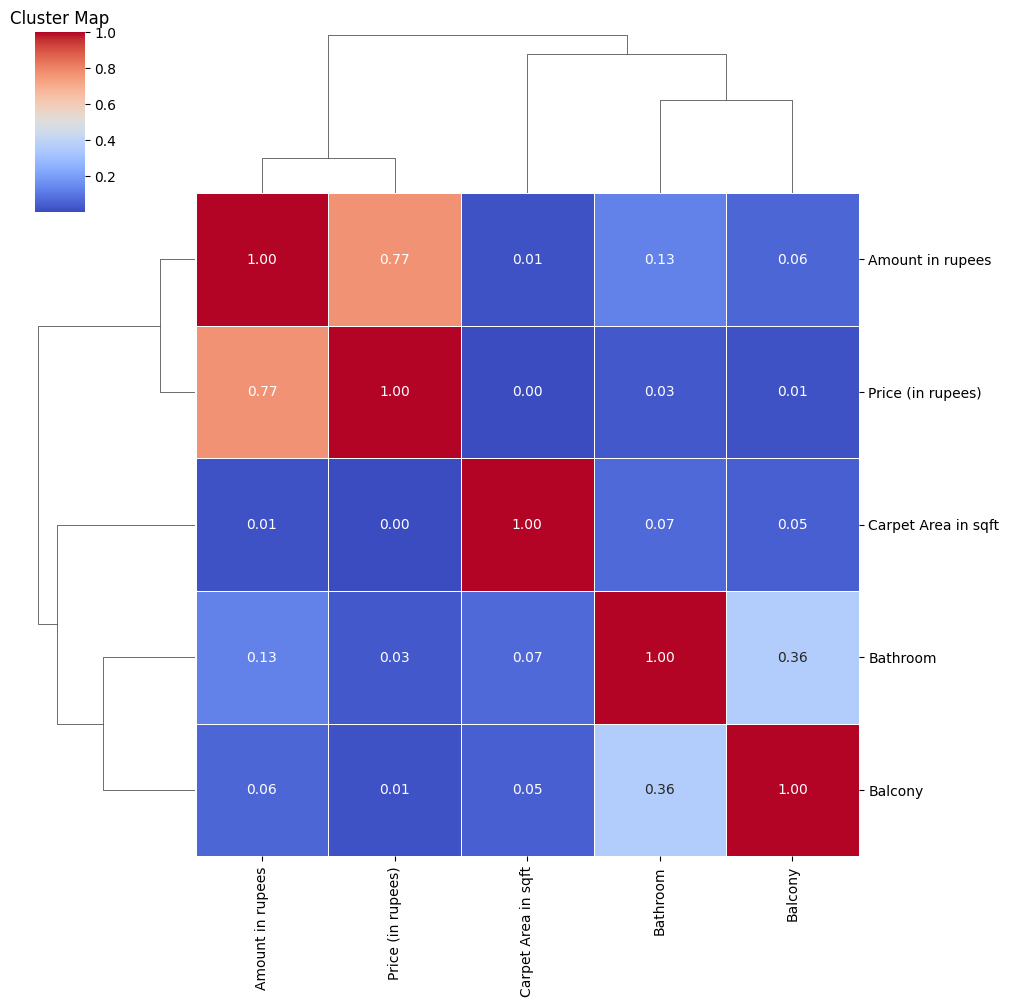

In [46]:
# Let's plot a cluster map for the correlation matrix of numeric columns
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cluster Map")
plt.show()

## ML Models

In [47]:
df.info

<bound method DataFrame.info of                                                     Title  \
0       1 BHK Ready to Occupy Flat for sale in Srushti...   
1       2 BHK Ready to Occupy Flat for sale in Dosti V...   
2       2 BHK Ready to Occupy Flat for sale in Sunrise...   
3             1 BHK Ready to Occupy Flat for sale Kasheli   
4       2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...                                                   ...   
187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description  Amount in rupees  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...         4200000.0   
1       One can find this stunning 2 BHK flat for sale...         9800000.0  

## Feature Selection

In [48]:
df.drop(columns=['Title','Description','Status'],inplace=True)

In [49]:
df.head(3)

,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,4200000.0,6000.0,thane,500.0,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,9800000.0,13799.0,thane,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,14000000.0,17500.0,thane,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold


## Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df

label_encode_columns = ['location','Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
df = label_encode_multiple(df, label_encode_columns)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68183 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Amount in rupees     65248 non-null  float64
 1   Price (in rupees)    68183 non-null  float64
 2   location             68183 non-null  int32  
 3   Carpet Area in sqft  68183 non-null  float64
 4   Floor                68183 non-null  int32  
 5   Transaction          68183 non-null  int32  
 6   Furnishing           68183 non-null  int32  
 7   facing               68183 non-null  int32  
 8   overlooking          68183 non-null  int32  
 9   Bathroom             68183 non-null  int32  
 10  Balcony              68183 non-null  int32  
 11  Ownership            68183 non-null  int32  
dtypes: float64(3), int32(9)
memory usage: 4.4 MB


In [52]:
# Fill NaN values with the mean of the column
mean_value = df['Amount in rupees'].mean()
df['Amount in rupees'].fillna(mean_value, inplace=True)

## Standard Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)
df = pd.DataFrame(df_standardized, columns=df.columns)

## Data Splitting

In [54]:
X = df.drop(columns=['Amount in rupees'])
y = df['Amount in rupees']

## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Model Building

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Model Prediction

In [59]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')

Linear Regression:
R-squared: 0.40
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 1.34
----------------------------------------
Random Forest:
R-squared: 0.27
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (RMSE): 1.48
----------------------------------------
Gradient Boosting:
R-squared: 0.21
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 1.54
----------------------------------------


## Hence, Linear Regression Model Performs better for this data when compared to other models.

[Source Code ](https://www.kaggle.com/code/sainitishmitta04/house-price-data-cleaning-eda-ml-models/notebook)

https://www.kaggle.com/code/sainitishmitta04/house-price-data-cleaning-eda-ml-models/notebook